In [1]:
import sklearn
print(sklearn.__version__)

0.19.1


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['data'].shape

(150, 4)

In [7]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state=0)

In [11]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [12]:
x_test.shape, y_test.shape

((38, 4), (38,))

In [13]:
import pandas as pd

In [15]:
iris_frame = pd.DataFrame(x_train, columns=iris.feature_names)
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017213AD4780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000017215489160>]], dtype=object)

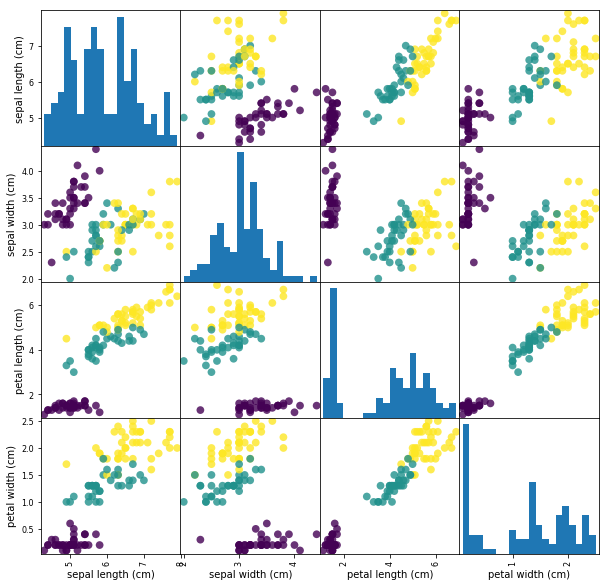

In [21]:
%matplotlib inline
pd.plotting.scatter_matrix(iris_frame, c = y_train, figsize=(10,10), marker = 'o', hist_kwds={'bins':20}, s=60, alpha=.8)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
import numpy as np

x_new = np.array([[5,2.9,1,0.2]])
x_new.shape

(1, 4)

In [29]:
predict = knn.predict(x_new)
predict

array([0])

In [30]:
iris['target_names'][predict]

array(['setosa'],
      dtype='<U10')

In [31]:
y_pred = knn.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [32]:
np.mean(y_pred == y_test)

0.97368421052631582

In [33]:
knn.score(x_test,y_test)

0.97368421052631582